In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.shape

(3973, 31)

## To check null values


In [4]:
dataset.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
pd.value_counts(dataset['Class'])

,count
Class,
0.0,3970
1.0,2


<Axes: ylabel='count'>

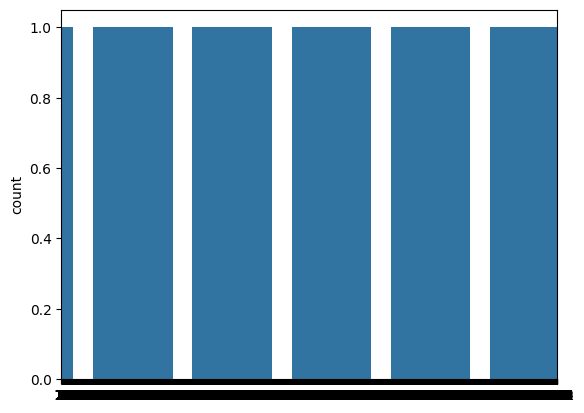

In [7]:
sns.countplot(dataset['Class'])

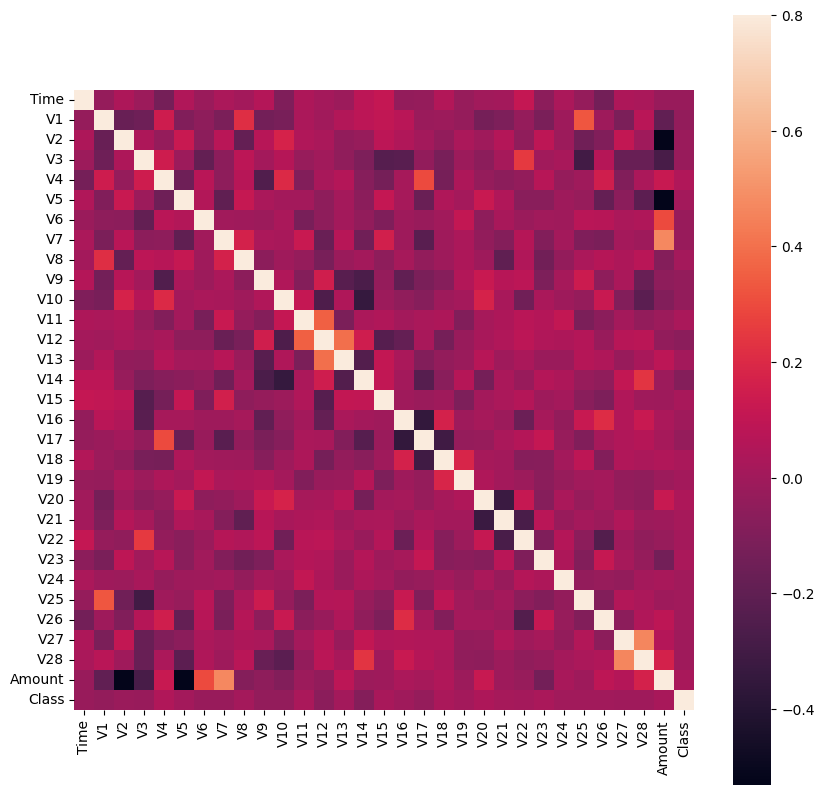

In [8]:
corrmat = dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat , vmax=0.8 , square=True)
plt.show()

In [9]:
len(dataset[dataset['Class']==0]) #valid transaction

3970

In [10]:
len(dataset[dataset['Class']==1]) #fradulent transactions

2

In [11]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[: , -1].values

## convert imbalanced data to balanced data

In [16]:
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# ... (your existing code) ...

# Remove rows with NaN in y
mask = ~np.isnan(y)
X = X[mask]
y = y[mask]

ros = RandomOverSampler(random_state=0)
X = np.nan_to_num(X)  # Replace non-finite values in X
x_res, y_res = ros.fit_resample(X, y)

# ... (rest of your code) ...

In [17]:
X.shape

(3972, 30)

In [18]:
x_res.shape

(7940, 30)

In [19]:
from collections import Counter
print(Counter(y))
print(Counter(y_res))

Counter({0.0: 3970, 1.0: 2})
Counter({0.0: 3970, 1.0: 3970})


In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_res , y_res , test_size=0.3 , random_state=42)

In [21]:
x_train.shape

(5558, 30)

In [22]:
y_train.shape

(5558,)

## logistic regression

In [33]:
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Create and fit the imputer for features
imputer_X = SimpleImputer(strategy='mean')
x_train_imputed = imputer_X.fit_transform(x_train)
x_test_imputed = imputer_X.transform(x_test)

# Create and fit the imputer for the target variable
imputer_y = SimpleImputer(strategy='most_frequent')  # Use 'most_frequent' for classification targets
#Reshape y_train to a 2D array before imputation
y_train_reshaped = y_train.reshape(-1, 1)
y_train_imputed = imputer_y.fit_transform(y_train_reshaped)
y_train_imputed = y_train_imputed.ravel()  # Flatten the array

# Train the model using imputed data
lg = LogisticRegression(max_iter=10000)
lg.fit(x_train_imputed, y_train_imputed)  # Use y_train_imputed here
y_predicted = lg.predict(x_test_imputed)
accuracy = lg.score(x_test_imputed, y_test)

# Calculate F2 score, ROC-AUC score, and print the report
f2score = fbeta_score(y_test, y_predicted, beta=2)
y_proba = lg.predict_proba(x_test_imputed)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print(classification_report(y_test, y_predicted))
print("Accuracy:", accuracy)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00      1176

    accuracy                           1.00      2382
   macro avg       1.00      1.00      1.00      2382
weighted avg       1.00      1.00      1.00      2382

Accuracy: 0.9979009235936188
F2 Score: 0.9991503823279524
ROC-AUC Score: 1.0


ROC-AUC Score: 1.0
Accuracy: 0.9979009235936188


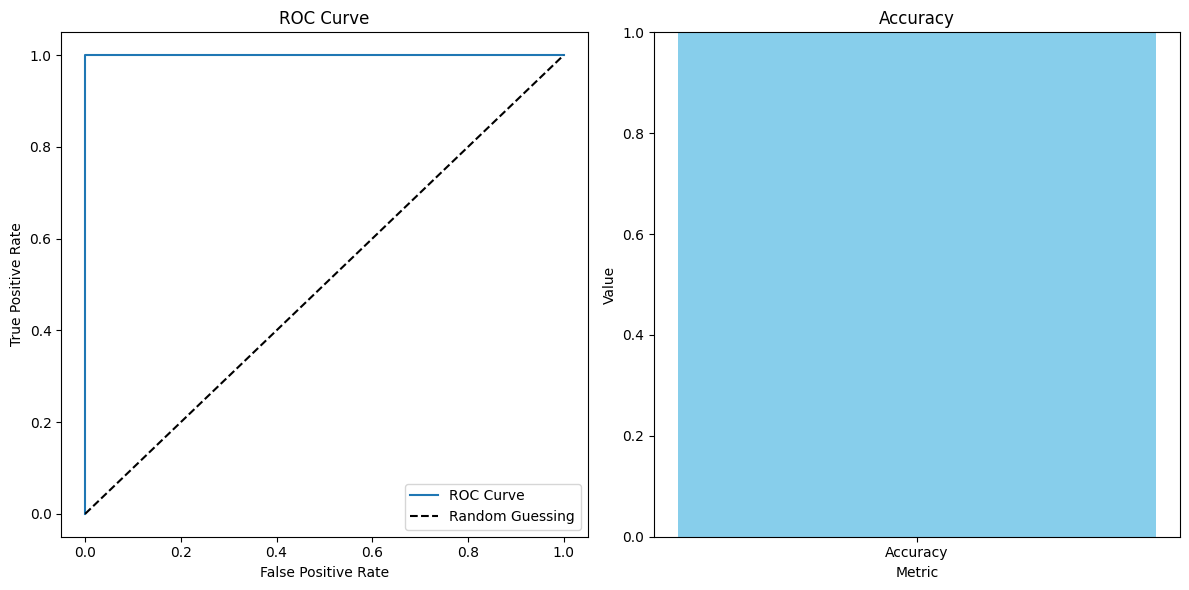

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

In [35]:
# Assuming you have already loaded and preprocessed the data

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score


# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = rf_classifier.predict(x_test)

# Evaluate the model
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)

# Calculate ROC-AUC score
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)

print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00      1176

    accuracy                           1.00      2382
   macro avg       1.00      1.00      1.00      2382
weighted avg       1.00      1.00      1.00      2382

F2 Score: 1.0
ROC-AUC Score: 1.0


## Gaussian NB


In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = nb_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_resampled, y_resampled)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00      1176

    accuracy                           1.00      2382
   macro avg       1.00      1.00      1.00      2382
weighted avg       1.00      1.00      1.00      2382

F2 Score: 1.0
ROC-AUC Score: 1.0


ROC-AUC Score: 1.0
Accuracy: 0.9979009235936188


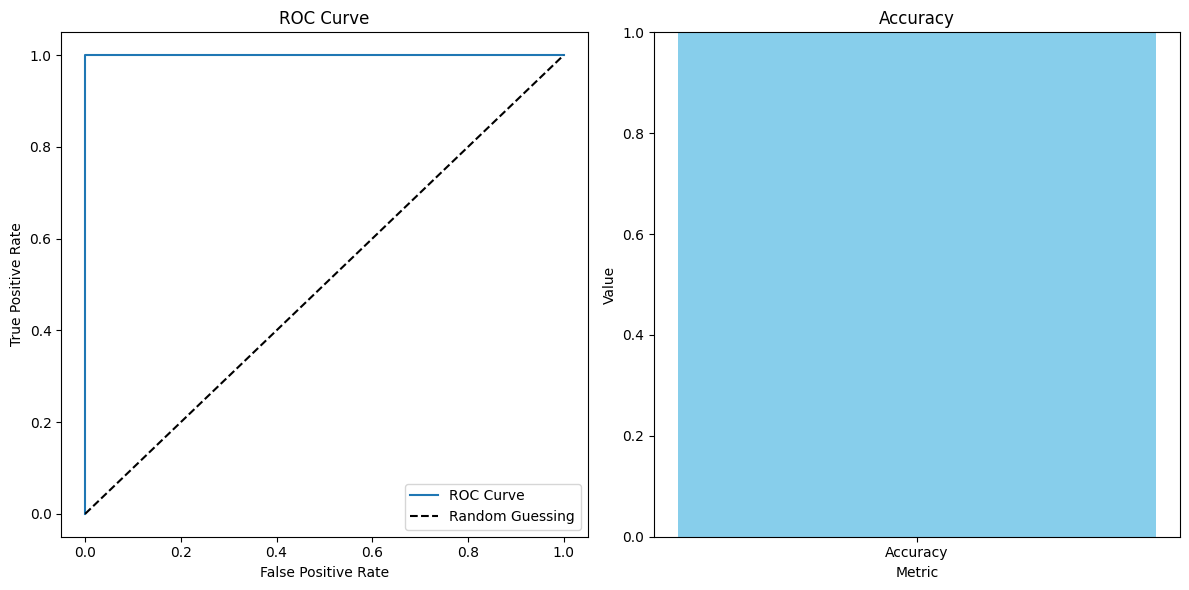

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

## KNN

In [39]:
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
knn_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = knn_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00      1176

    accuracy                           1.00      2382
   macro avg       1.00      1.00      1.00      2382
weighted avg       1.00      1.00      1.00      2382

F2 Score: 0.9993201903467029
ROC-AUC Score: 1.0


ROC-AUC Score: 1.0
Accuracy: 0.9979009235936188


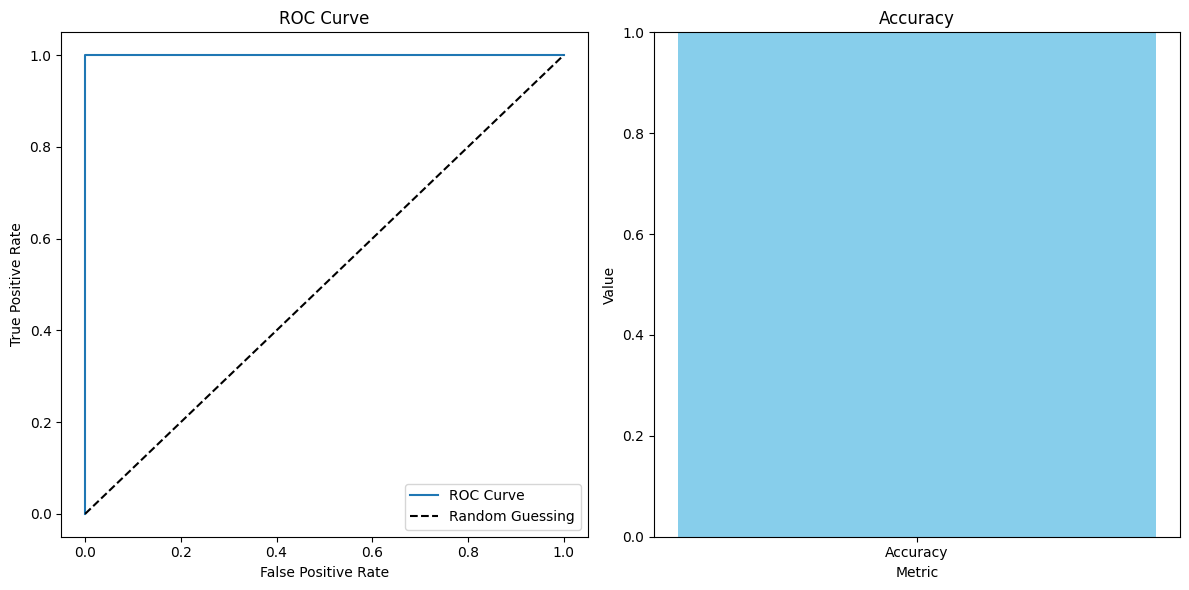

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

## Decesion tree classifier

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, fbeta_score, roc_auc_score

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_resampled, y_resampled)

# Predict on the test set
y_predicted = dt_classifier.predict(x_test)

# Evaluate the model
report = classification_report(y_test, y_predicted)
print(report)

f2score = fbeta_score(y_test, y_predicted, beta=2)
y_proba = rf_classifier.predict_proba(x_test)[:, 1]  # Probability of class 1
roc_auc = roc_auc_score(y_test, y_proba)
print("F2 Score:", f2score)
print("ROC-AUC Score:", roc_auc)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00      1176

    accuracy                           1.00      2382
   macro avg       1.00      1.00      1.00      2382
weighted avg       1.00      1.00      1.00      2382

F2 Score: 0.999829960891005
ROC-AUC Score: 1.0


ROC-AUC Score: 1.0
Accuracy: 0.9979009235936188


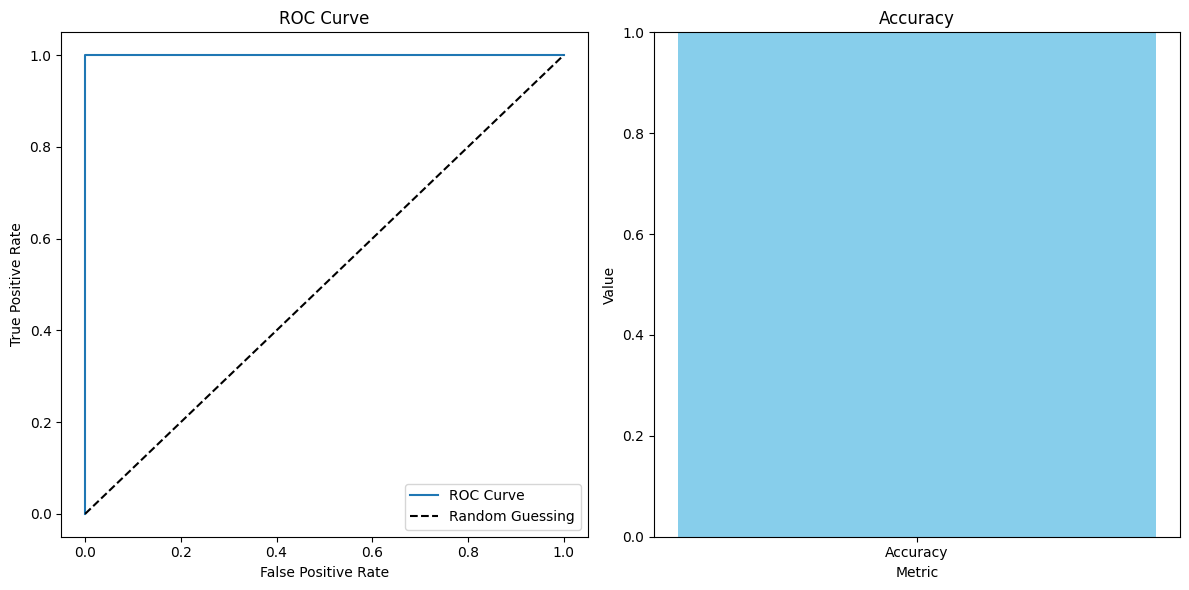

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Assuming lg is already trained and y_test, y_proba are calculated
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(12, 6))

# Subplot for ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
print("ROC-AUC Score:", roc_auc)
# Subplot for Accuracy
plt.subplot(1, 2, 2)
plt.bar(['Accuracy'], [accuracy], color='skyblue')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Accuracy')
print("Accuracy:", accuracy)
plt.ylim(0, 1)

# Adjust layout
plt.tight_layout()

plt.show()

## Random forest classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 641 , random_state=0)
classifier.fit(x_train , y_train)

RandomForestClassifier(n_estimators=641, random_state=0)

In [24]:
y_pred = classifier.predict(x_test)

In [25]:
n_errors = (y_pred != y_test).sum()

In [26]:
n_errors

0

In [27]:
y_test.shape

(2382,)

1.0


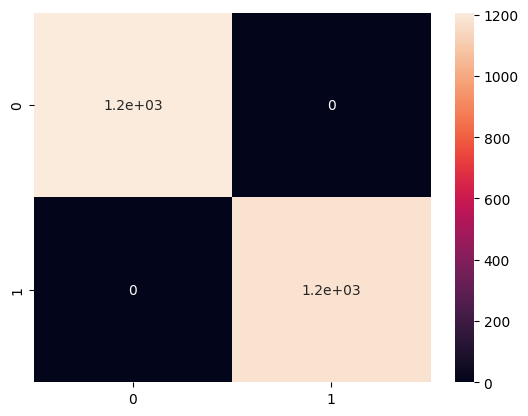

In [28]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)
print(accuracy_score(y_test , y_pred))

In [29]:
from sklearn.metrics import precision_score
precision_score(y_test , y_pred)

1.0

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test , y_pred)

1.0

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00      1176

    accuracy                           1.00      2382
   macro avg       1.00      1.00      1.00      2382
weighted avg       1.00      1.00      1.00      2382



In [ ]:
#Thank you!!